<a href="https://colab.research.google.com/github/srkpriyanka95/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Have you ever wondered when is the best time of the year to book a hotel room is? or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This dataset contains information for a city hotel and a resort hotel.Lets Explore and Analyse the data to discover important factors that govern the bookings.** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Let's load the data to be analysed
hotel=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Hotel Booking Analysis - Priyanka/Hotel Bookings.csv')

In [ ]:
#Let's check how big is the data
hotel.shape

(119390, 32)

In [ ]:
#Now it time to know the features of the observations
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Let's look deeper into the data
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Let us take a closer look into the dataset
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,Data Not Entered,Data Not Entered,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,Data Not Entered,Data Not Entered,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,Data Not Entered,Data Not Entered,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,Data Not Entered,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Data Not Entered,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Let's have a look at the end of the dataset
hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# its good to make sure what we are dealing with
hotel['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
#Let's look how many years of data we have
hotel['arrival_date_year'].unique()

array([2015, 2016, 2017])

#**We know that the dataset comprises three years of data. But we don't know whether it holds details about all months of the year. Let us look at the particulars to get more insights about when it starts and ends.**

In [ ]:
#Its the start date of data
hotel[['arrival_date_day_of_month','arrival_date_year','arrival_date_month']].iloc[0]

arrival_date_day_of_month       1
arrival_date_year            2015
arrival_date_month           July
Name: 0, dtype: object

In [ ]:
#Look the end date of data
hotel[['arrival_date_day_of_month','arrival_date_year','arrival_date_month']].iloc[-1]

arrival_date_day_of_month        29
arrival_date_year              2017
arrival_date_month           August
Name: 119389, dtype: object

#**Now we have a better idea about how the data looks and what information we have for the analysis. But the data may also have null values. So let's find out whether we have any. If so, let's see how we deal with nulls**

In [ ]:
#Its time to know, whether we have any null values
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Now we know about the columns that has null values.So, now we can fill up relevant input to replace null in those columns
hotel.fillna('Data Not Entered',inplace=True)

In [ ]:
#Let's check again and see if all nulls have been handled.
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

#**Let's dig deeper and see how the data is been spread in the dataset.**

# **Number of bookings over the years**

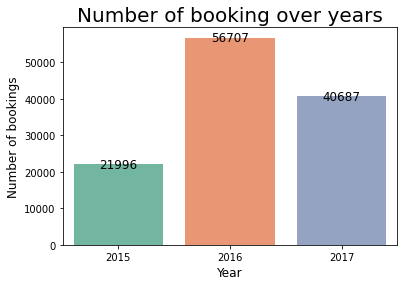

In [ ]:
#How many years of data do we have, and how are the bookings differ from each year
booking_by_year=sns.countplot(data=hotel,x='arrival_date_year')
sns.set_palette("Set2")
booking_by_year.set_xlabel('Year',fontsize=12)
booking_by_year.set_ylabel('Number of bookings',fontsize=12)
booking_by_year.set_title('Number of booking over years',fontsize=20)
booking_by_year.set_xticklabels(booking_by_year.get_xticklabels(),rotation=0)
for n in booking_by_year.patches:
  booking_by_year.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12,va='center')
plt.show()

# **Which hotel is preffered or booked by customers?**

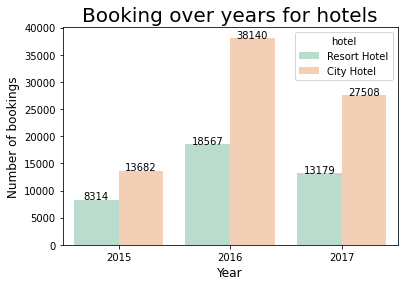

In [ ]:
#There are two types of hotels.Which one did customers prefer the most
hotel_over_years=sns.countplot(data=hotel,x='arrival_date_year',hue='hotel')
sns.set_palette('Pastel2')
hotel_over_years.set_xlabel('Year',fontsize=12)
hotel_over_years.set_ylabel('Number of bookings',fontsize=12)
hotel_over_years.set_title('Booking over years for hotels',fontsize=20)
hotel_over_years.set_xticklabels(booking_by_year.get_xticklabels(),rotation=0)
for n in hotel_over_years.patches:
  hotel_over_years.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=10)
plt.show()

#**Let's look at how bookings differ for different months of the year.**

In [102]:
#Total bookings over months
#As arrival month data is string we are just replacing it temporarily for groupby
month_wise_booking = hotel.replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11 ,'December':12}).groupby(['arrival_date_year','arrival_date_month'],as_index=False)['hotel'].count().sort_values(['arrival_date_year','arrival_date_month'],ascending=[False,True]).replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November' ,12:'December'})
month_wise_booking

,arrival_date_year,arrival_date_month,hotel
18,2017,January,3681
19,2017,February,4177
20,2017,March,4970
21,2017,April,5661
22,2017,May,6313
23,2017,June,5647
24,2017,July,5313
25,2017,August,4925
6,2016,January,2248
7,2016,February,3891


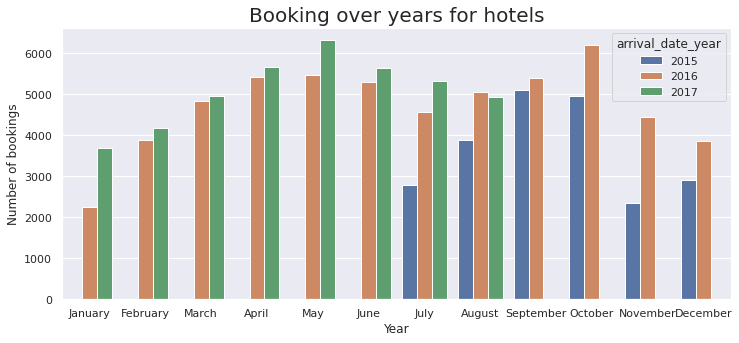

In [107]:
bookings_over_months=sns.barplot(data=month_wise_booking,x='arrival_date_month',y='hotel',hue='arrival_date_year')
sns.set(rc={"figure.figsize":(12, 5)})
bookings_over_months.set_xlabel('Year',fontsize=12)
bookings_over_months.set_ylabel('Number of bookings',fontsize=12)
bookings_over_months.set_title('Booking over years for hotels',fontsize=20)
bookings_over_months.set_xticklabels(bookings_over_months.get_xticklabels(),rotation=0)
plt.show()


#**Percentage of booking being cancelled**


In [63]:
import plotly.express as px

In [58]:
booking_cancellation

,index,is_canceled
0,0,75166
1,1,44224


In [118]:
booking_cancellation = hotel['is_canceled'].value_counts().reset_index()
booking_cancekation_plot = px.pie(booking_cancellation,values=booking_cancellation['is_canceled'],names=['Not Cancelled','Cancelled'],color_discrete_sequence=px.colors.sequential.Mint,width=500,height=500)
booking_cancekation_plot.update_layout(title='Cancellation of Bookings',title_x=0.2,title_y=0.9)
booking_cancekation_plot.show()

#**Country from which most clients are from**

In [121]:
#Country names are not given in the data,it onl containa abbrevations.so,Lets get the country name using pycountry
import pycountry
def get_country_code(x):
    try:
        return pycountry.countries.get(alpha_3=x).name
    except:
        return "not found"
hotel['country_name'] = hotel.apply(lambda x:get_country_code(x['country']),axis=1)

In [171]:
country_wise_count=hotel.groupby(['country','country_name'],as_index=False)['hotel'].count().sort_values('hotel',ascending=False)
country_wise_count.rename(columns={'hotel':'Number_of_Bookings'},inplace=True)
country_wise_count.query('Number_of_Bookings>=50',inplace=True)
country_wise_count

,country,country_name,Number_of_Bookings
135,PRT,Portugal,48590
59,GBR,United Kingdom,12129
56,FRA,France,10415
51,ESP,Spain,8568
43,DEU,Germany,7287
81,ITA,Italy,3766
76,IRL,Ireland,3375
15,BEL,Belgium,2342
25,BRA,Brazil,2224
123,NLD,Netherlands,2104


In [173]:
Country_wise=px.choropleth(country_wise_count,locations='country',color='Number_of_Bookings',scope='world')

In [174]:
Country_wise.show()

In [175]:
hotel['is_repeated_guest'].sum()

3810